# Excerise 5 -- estimation of a keynesian consumption equation
* Joakim Blix Prestmo
* 01.11.2018

In [1]:
import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [125]:
df = pd.read_excel("../MakroData.xlsx", sheet_name="Ark5")
df_macro = pd.read_excel("http://www.ssb.no/statbank/sq/10010628/", skiprows=3, nrows=162)

In [126]:
df.head()

,PBOL,K83,RD300,RAM300,NB,BEF1574,NT,ntot,BF300,BG300,...,Y66,Y65,Y6,KPI,ww,YE,yei300,yei100,RENREALLONG,pbkgamma
1978-01,0.10272,1.247729e+06,30660.23088,78.5,4055.18675,2892.92766,ND,1868.51558,137245.84375,117992.60156,...,4001.10214,1840.03003,51160.40262,0.218255,40.73216,7169.00218,6879.75,688.25,G 0.00500,0.025
1978-02,0.10702,1.262613e+06,31641.81006,78.5,4059.21146,2897.92249,ND,1884.55472,139720.28125,121831.46875,...,2951.41052,1839.29358,54685.59631,0.225750,41.68868,10115.45120,6879.75,688.25,0.005,0.025
1978-03,0.11116,1.279843e+06,31853.51051,78.5,4063.28041,2902.97249,ND,1865.15321,140142.43750,124409.70313,...,3647.62540,2012.99174,57741.30455,0.240648,48.71819,16528.32300,6879.75,688.25,0.005,0.025
1978-04,0.11499,1.296472e+06,32344.44765,78.5,4067.34930,2908.05008,ND,1888.17652,147638.00000,131623.71875,...,3009.86194,2189.68465,58799.68775,0.231967,42.13985,15809.21684,6879.75,688.25,0.005,0.025
1979-01,0.11844,1.308271e+06,32802.68954,149.0,4070.19727,2912.91681,ND,1891.77716,153980.68750,132862.85938,...,3549.74414,2064.86436,57865.93527,0.230633,41.76708,13676.67289,6879.75,844.25,0.005,0.025


In [127]:
df_macro['Unnamed: 0'] = df_macro['Unnamed: 0'].str.replace('K','Q')
df_macro = df_macro.drop(['Unnamed: 0'], axis=1)
df_macro.index = pd.Index(pd.period_range('1978-01', periods=210, freq='Q'))

In [128]:
df.index = pd.Index(pd.period_range('1978-01', periods=156, freq='Q'))


# Figures


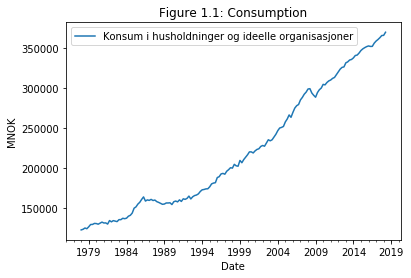

In [129]:
# Add title and legend
df_macro['Konsum i husholdninger og ideelle organisasjoner'].plot()
plt.title("Figure 1.1: Consumption")
plt.legend()
plt.xlabel('Date', fontdict=None, labelpad=None)
plt.ylabel('MNOK')
plt.show()


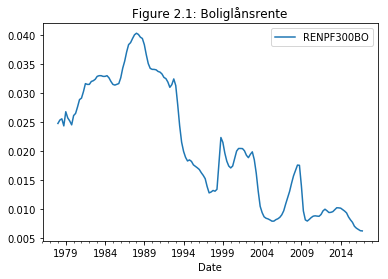

In [130]:
# Add title and legend
df['RENPF300BO'].plot()
plt.title("Figure 2.1: Boliglånsrente")
plt.legend()
plt.xlabel('Date', fontdict=None, labelpad=None)
plt.ylabel('')
plt.show()

In [131]:
df_merge=df.merge(df_macro, how='left', on=None, left_on=None, left_index=True, right_index=True)

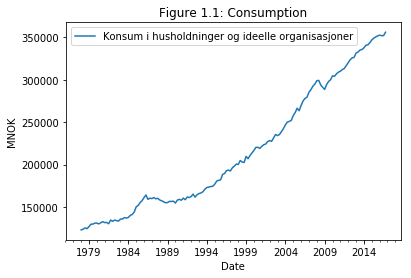

In [132]:
# Add title and legend
df_merge['Konsum i husholdninger og ideelle organisasjoner'].plot()
plt.title("Figure 1.1: Consumption")
plt.legend()
plt.xlabel('Date', fontdict=None, labelpad=None)
plt.ylabel('MNOK')
plt.show()

# Features engineering


In [149]:
# Create growth rates:
# df[log_C] = ...
df_merge['Dc'] = np.log(df_merge['Konsum i husholdninger og ideelle organisasjoner']).diff(4)
df_merge['RD300-RAM300'] = (df_merge['RD300']-df_merge['RAM300'])/df_merge['KPI']
df_merge['Drd300'] = np.log(df_merge['RD300-RAM300']).diff(4)

df_merge['rd300_1'] = np.log(df_merge['RD300-RAM300']).shift(1)
df_merge['c_1'] = np.log(df_merge['Konsum i husholdninger og ideelle organisasjoner']).shift(1)

df_merge['Dc_1']=(df_merge['Dc']).shift(1)
df_merge['Drd300_1']=(df_merge['Drd300']).shift(1)
df_merge['Dc_2']=(df_merge['Dc_1']).shift(1)
df_merge['Drd300_2']=(df_merge['Drd300_1']).shift(1)


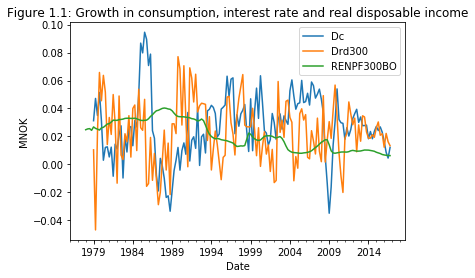

In [150]:
df_merge['Dc'].plot()
df_merge['Drd300'].plot()
df_merge['RENPF300BO'].plot()
plt.title("Figure 1.1: Growth in consumption, interest rate and real disposable income")
plt.legend()
plt.xlabel('Date', fontdict=None, labelpad=None)
plt.ylabel('MNOK')
plt.show()

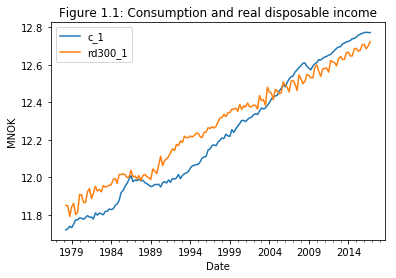

In [151]:
df_merge['c_1'].plot()
df_merge['rd300_1'].plot()
plt.title("Figure 1.1: Consumption and real disposable income")
plt.legend()
plt.xlabel('Date', fontdict=None, labelpad=None)
plt.ylabel('MNOK')
plt.show()

In [152]:
import statsmodels.api as sm # import statsmodels 


In [153]:
df_merge.head()

,PBOL,K83,RD300,RAM300,NB,BEF1574,NT,ntot,BF300,BG300,...,"Bruttonasjonalprodukt Fastlands-Norge, markedsverdi",Dc,RD300-RAM300,Drd300,rd300_1,c_1,Dc_1,Drd300_1,Dc_2,Drd300_2
1978Q1,0.10272,1.247729e+06,30660.23088,78.5,4055.18675,2892.92766,ND,1868.51558,137245.84375,117992.60156,...,263367.0,NaN,140119.236622,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1978Q2,0.10702,1.262613e+06,31641.81006,78.5,4059.21146,2897.92249,ND,1884.55472,139720.28125,121831.46875,...,266308.0,NaN,139815.368194,NaN,11.850249,11.719281,NaN,NaN,NaN,NaN
1978Q3,0.11116,1.279843e+06,31853.51051,78.5,4063.28041,2902.97249,ND,1865.15321,140142.43750,124409.70313,...,267246.0,NaN,132039.543375,NaN,11.848078,11.725639,NaN,NaN,NaN,NaN
1978Q4,0.11499,1.296472e+06,32344.44765,78.5,4067.34930,2908.05008,ND,1888.17652,147638.00000,131623.71875,...,272114.0,NaN,139097.166735,NaN,11.790857,11.738490,NaN,NaN,NaN,NaN
1979Q1,0.11844,1.308271e+06,32802.68954,149.0,4070.19727,2912.91681,ND,1891.77716,153980.68750,132862.85938,...,273996.0,0.03122,141582.910483,0.010392,11.842928,11.731499,NaN,NaN,NaN,NaN


In [154]:
df_merge['Dc'].shape, df_merge['Drd300'].shape

((156,), (156,))

In [159]:
# df_merge.drop(pd.Date('1978Q1'))
df_model = df_merge.drop(df_merge.index[[0,1,2,3,4,5]])    
df_model['Dc'].shape, df_model['Drd300'].shape

((150,), (150,))

In [160]:
df_model[['Drd300_1', 'RENPF300BO']]
# df_merge[['DC']]

,Drd300_1,RENPF300BO
1979Q3,-0.046912,0.02521
1979Q4,0.023183,0.02453
1980Q1,0.065746,0.02613
1980Q2,0.045515,0.02650
1980Q3,0.063683,0.02763
1980Q4,0.051656,0.02888
1981Q1,0.014172,0.02913
1981Q2,0.033550,0.03025
1981Q3,0.021410,0.03163
1981Q4,0.049959,0.03150


In [166]:
modell1 = ["Drd300"]
modell2 = ["RENPF300BO","Drd300"]
modell3 = ["RENPF300BO","Drd300","rd300_1", 'c_1']
modell4 = ["RENPF300BO","Dc_1","Drd300","Drd300_1","rd300_1", 'c_1']


In [167]:
y = df_model[["Dc"]] ## X usually means our input variables (or independent variables)
X = df_model[modell4] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
y.shape, X.shape

((150, 1), (150, 7))

In [168]:
# Note the difference in argument order
model = sm.OLS(y,X).fit() ## sm.OLS(output, input)


In [169]:
#predictions = model.predict(DC)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Dc   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     36.75
Date:                Tue, 06 Nov 2018   Prob (F-statistic):           1.07e-26
Time:                        12:34:54   Log-Likelihood:                 422.86
No. Observations:                 150   AIC:                            -831.7
Df Residuals:                     143   BIC:                            -810.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1802      0.160      1.127      0.261      -0.136       0.496
RENPF300BO    -0.7332      0.280     -2.621      0.010      -1.286      -0.180
Dc_1           0.6812      0.058     11.733      0.000       0.566       0.796
Drd300         0.0121      0.062      0.196      0.845      -0.110       0.134
Drd300_1       0.0483      0.062      0.773      0.441      -0.075       0.172
rd300_1        0.0267      0.029      0.905      0.367      -0.032       0.085
c_1           -0.0397      0.022     -1.843      0.067      -0.082       0.003
==============================================================================
Omnibus:                        1.642   Durbin-Watson:                   2.239
Prob(Omnibus):                  0.440   Jarque-Bera (JB):                1.274
Skew:                          -0.057   Prob(JB):                        0.529
Kurtosis:                       3.437   Cond. No.                     4.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [170]:
%pylab inline
# We pick 100 hundred points equally spaced from the min to the max //create a test-set within the range of our min-max values
X_prime = np.linspace(y.y.min(), y.y.max(), 100)[:, np.newaxis]
X_prime = sm.add_constant(X_prime) # add constant as we did before

# Now we calculate the predicted values
y_hat = model.predict(X_prime)

plt.scatter(df_merge['DC'], df_merge['DRD300'] , alpha=0.3) # Plot the raw data
plt.xlabel("DC")
plt.ylabel("DRD300")
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9) # Add the regression line, colored in red


Populating the interactive namespace from numpy and matplotlib


AttributeError: 'DataFrame' object has no attribute 'y'